In [0]:
from tensorflow.python.client import device_lib

print("Show System RAM Memory:\n\n")
!cat /proc/meminfo | egrep "MemTotal*"

print("\n\nShow Devices:\n\n" +str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13335276 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15627956196796146670
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16059514202464114603
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3236601350533681243
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5565825243007158997
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from google.colab import files
files.upload()
# choose the file on your computer to upload it then

Saving airline_preprocessing.py to airline_preprocessing.py
Saving airline.py to airline.py


{'airline.py': b'import fastai\nfrom fastai import *\nfrom fastai.text import *\nfrom fastai.core import *\nimport pickle\nfrom fastai.callbacks import *\n\n\n# Tabular data should be in a Pandas DataFrame\npath = \'/Users/lade/Dev/myOpenSet/Tweets.csv\'\nd = pd.read_csv(path)\n\nd.head()\n\npat = Path(\'/Users/lade/Dev/myOpenSet\')\n\n\n# To get a DataBunch quickly, there are also several factory methods depending on how our data is structured. They are all detailed in text.data, here we\'ll use the method from_csv of the TextLMDataBunch (to get the data ready for a language model) and TextClasDataBunch (to get the data ready for a text classifier) classes. The TextLMDataBunch class creates a TextDataBunch suitable for training a language model. All the texts in the datasets are concatenated and the labels are ignored. Instead, the target is the next word in the sentence.\n# Building our DataBunches for LM fine-tuning and classification\n# Language model data\nd_lm = TextLMDataBunch.f

In [0]:
import fastai
from fastai import *
from fastai.text import *
from fastai.core import *
import pickle
from fastai.callbacks import *

In [0]:
path = Path("/content/airline")
d = pd.read_csv("/content/airline/texts.csv")
d.head()

,label,text
0,0,What said.
1,1,plus youve added commercials to the experienc...
2,0,I didnt today... Must mean I need to take ano...
3,-1,its really aggressive to blast obnoxious ente...
4,-1,and its a really big bad thing about it


In [0]:
# DataBunches 
d_lm = TextLMDataBunch.from_csv(path, 'texts.csv')

# Classifier data
d_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=d_lm.train_ds.vocab, bs=32)

d_lm.save('/content/airline/data_lm_export.pkl')
d_clas.save('/content/airline/data_clas_export.pkl')

In [0]:
# Tokenization
d_clas.show_batch()
d_clas.vocab.itos[:10]

text,target
xxbos i xxup just xxup asked xxup my xxup boyfriend xxup to xxup prom xxup over xxup the xxup xxunk xxup on xxup flight xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,1
"xxbos e xxrep 4 y ! xxmaj cancelled xxmaj flightlations , xxmaj flight xxmaj booking xxmaj problemss , reflight xxmaj booking xxmaj problemss , but y all got me on the same flight out tonight not tomorrow & the xxup fc upgrade . xxmaj thx !",1
"xxbos my wife was on a flt from xxup bro to xxup tul via xxup dfw that was xxmaj cancelled xxmaj flighted . xxmaj bought an xxup swa flight to get her home . xxmaj partial refund , xxup dm me plz ?",-1
xxbos seriously ! ! ! xxmaj flight xxmaj cancelled xxmaj flighted . xxmaj auto rebooked to xxmaj tuesday ? ? ? xxmaj then hr min on hold for nothing . xxmaj xxunk car . xxmaj want refund xxrep 4 !,-1
xxbos i ca nt do that flight . i need a xxmaj late xxmaj flightr one ! i need you to change my flight . xxmaj you guys changed it and now i ca nt do that time !,-1


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [0]:
# TRAINING A LANGUAGE MODEL
learn = language_model_learner(d_lm, AWD_LSTM, drop_mult=0.3)

The above model is trained on a recurrent neural network which pre-trained on the popular Wikitext dataset because it is a universal dataset for English language.

In [0]:
# 1-cycle learning rate policy
learn.fit_one_cycle(1, 1e-2,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.405338,4.186697,0.234182,00:10


Better model found at epoch 0 with val_loss value: 4.186697483062744.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06


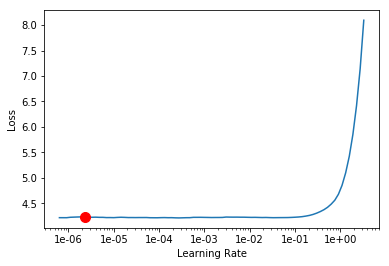

In [0]:
# Language model fine tuning, we ensure that cycle length and learning rate are optimised.
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
# Like a computer vision model, we can then unfreeze the model and fine-tune it.
# all layers now trainable
learn.unfreeze() 

In [0]:
# tried 10 epochs to get low validation loss
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.170763,4.110605,0.241726,00:13
1,4.080368,4.004917,0.258750,00:13
2,3.956521,3.929120,0.266161,00:13
3,3.822798,3.888248,0.271756,00:13
4,3.674075,3.868410,0.274539,00:13
5,3.526298,3.862055,0.275491,00:13
6,3.398553,3.872504,0.274896,00:13
7,3.289793,3.886725,0.273631,00:13
8,3.217367,3.888351,0.275179,00:13
9,3.178264,3.889232,0.274836,00:13


In [0]:
learn.predict("I am going", n_words=10)

'I am going through the whole process of asking that to be'

In [0]:
learn.save_encoder("fine_T")